<a href="https://colab.research.google.com/github/matheus-hrm/deep-learning/blob/main/part_derivatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import sympy.plotting.plot as symplot

In [2]:
def peaks(x,y):
  x,y = np.meshgrid(x,y)
  z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
    - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
    - 1/3*np.exp(-(x+1)**2 - y**2)
  return z


<function matplotlib.pyplot.show(close=None, block=None)>

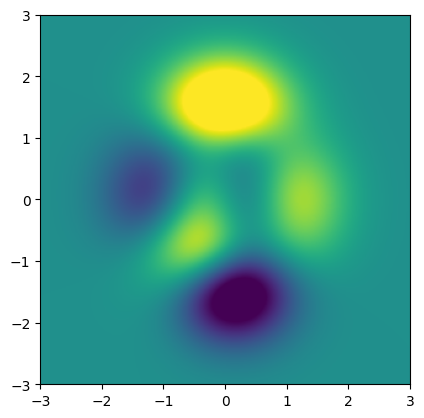

In [3]:
x = np.linspace(-3,3,300)
y = np.linspace(-3,3,300)

Z = peaks(x,y)

plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.show

In [15]:
sx,sy = sym.symbols('sx,sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2) - (sy+1)**2) \
        - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
        - 1/3 * sym.exp(-(sx+1)**2 - sy**2)

df_x = sym.lambdify((sx,sy),sym.diff(sZ,sx),'sympy')
df_y = sym.lambdify((sx,sy),sym.diff(sZ,sy),'sympy')

df_x(1,1).evalf()


-1.07369833656079

In [76]:
local = np.random.rand(2)*4-2
start = local[:]

rate = .01
epochs = 1000

trajectory = np.zeros((epochs,2))
for i in range(epochs):
  grad = np.array([
          df_x(local[0],local[1]).evalf(),
          df_y(local[0],local[1]).evalf()
        ])
  local = local - rate*grad
  trajectory[i,:] = local

print(start)
print(local)

[ 1.24805418 -0.13556466]
[0.228278920556369 -1.62553495750000]


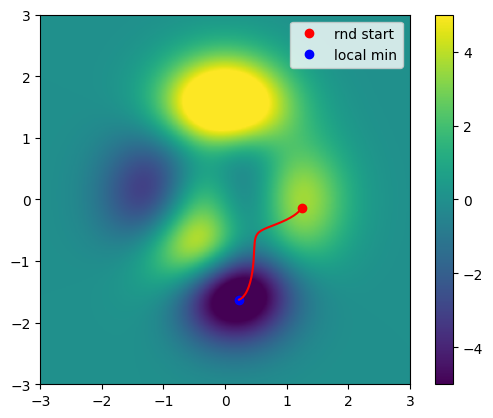

In [77]:
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(start[0],start[1],'ro')
plt.plot(local[0],local[1],'bo')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local min'])
plt.colorbar()
plt.show()

# Finding local maxima

[-2  2]
[-0.00931758195995413 1.58136796293900]


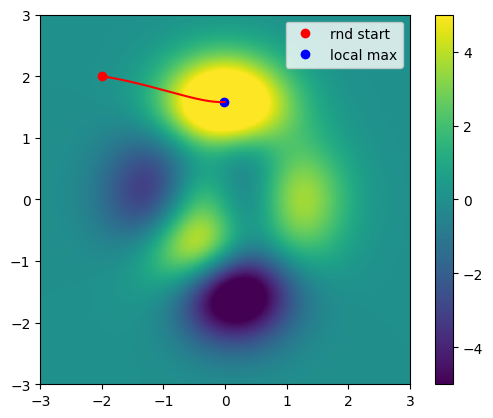

In [62]:
local = np.array([-2,2])
start = local[:]

rate = .01
epochs = 1000

trajectory = np.zeros((epochs,2))
for i in range(epochs):
  grad = np.array([
          df_x(local[0],local[1]).evalf(),
          df_y(local[0],local[1]).evalf()
        ])
  local = local + rate*grad
  trajectory[i,:] = local

print(start)
print(local)
plt.imshow(Z,extent=[x[0],x[-1],y[0],y[-1]],vmin=-5,vmax=5,origin='lower')
plt.plot(start[0],start[1],'ro')
plt.plot(local[0],local[1],'bo')
plt.plot(trajectory[:,0],trajectory[:,1],'r')
plt.legend(['rnd start','local max'])
plt.colorbar()
plt.show()